# create dummy for 5 weeks with high residual

In [45]:
import os
import re

import pandas as pd
import numpy as np

from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_dir = '/Users/boyuliu/pyprojects/Joann/Joann-Thailand-Project/notebooks/datasets/new_dataset/'

wv_data_file = 'regression_data_wv_cases1_causal_ma_detrend_20210211.csv'
residual_data = '/Users/boyuliu/Dropbox (MIT)/Boyu-Joann/Intermediate output/outputs/grid_search/residual_over_time_02192021.csv'
print(residual_data)
# df = pd.read_csv(data_dir + wv_data_file)
df = pd.read_csv(residual_data)
print(df.shape)
df.head()

/Users/boyuliu/Dropbox (MIT)/Boyu-Joann/Intermediate output/outputs/grid_search/residual_over_time_02192021.csv
(6380, 46)


,province,year_week,total_demand,perc_abuse,wv_count,ex_rate,fake_date,month,quarter,ex_rate_diff,...,demand_shock_minus_2,demand_shock_minus_3,demand_shock_minus_4,demand_shock_minus_5,demand_shock_minus_6,demand_shock_minus_7,demand_shock_minus_8,yr_wk_float,residual,fitted.values
0,Ang Thong,2018-02,0,0.0,0,5.00602,2018-01-08,2018-01,2018-1,-0.032813,...,0.000000,0.985677,-0.246419,-0.197135,-0.164280,1.337705,-0.308024,2018.02,-0.008638,0.008638
1,Ang Thong,2018-03,0,0.0,0,5.02540,2018-01-15,2018-01,2018-1,0.019380,...,0.985677,-0.246419,-0.197135,-0.164280,1.337705,-0.308024,-0.308024,2018.03,-0.098752,0.098752
2,Ang Thong,2018-04,0,0.0,0,5.03024,2018-01-22,2018-01,2018-1,0.004840,...,-0.246419,-0.197135,-0.164280,1.337705,-0.308024,-0.308024,-0.308024,2018.04,0.013891,-0.013891
3,Ang Thong,2018-05,10,0.0,0,5.03048,2018-01-29,2018-01,2018-1,0.000240,...,-0.197135,-0.164280,1.337705,-0.308024,-0.308024,-0.308024,-0.308024,2018.05,0.009385,-0.009385
4,Ang Thong,2018-06,0,0.0,0,5.08050,2018-02-05,2018-02,2018-1,0.050020,...,-0.164280,1.337705,-0.308024,-0.308024,-0.308024,-0.308024,-0.184815,2018.06,0.006381,-0.006381


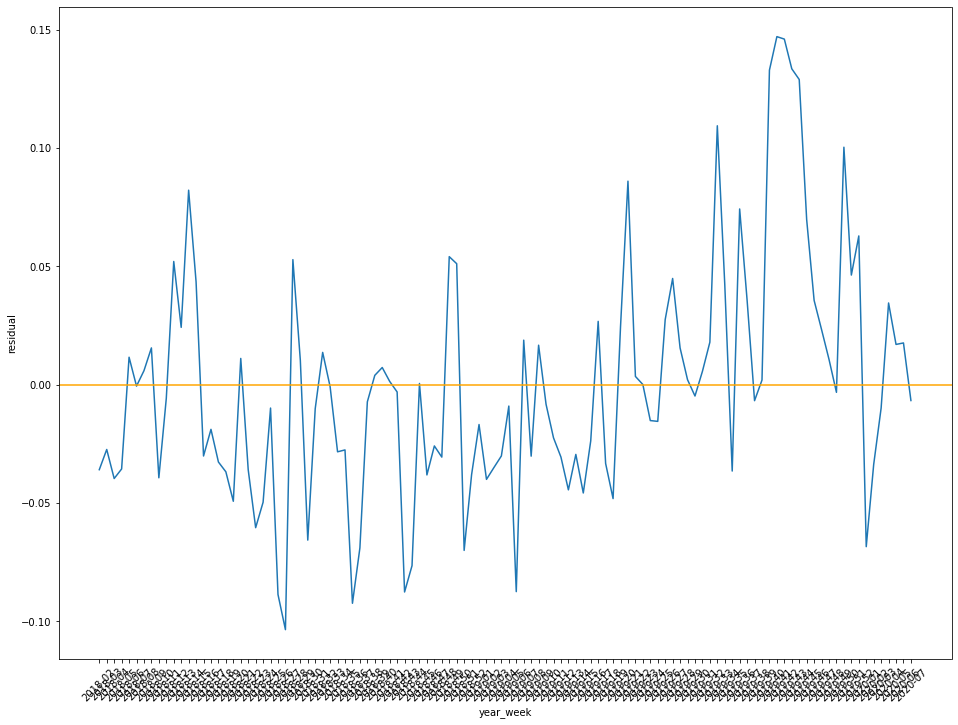

In [16]:
mean_residuals_by_week = df.groupby('year_week').mean()['residual']#.reset_index()
# sns.lineplot(mean_residuals_by_week, x='year_week', y='residual')
plt.figure(figsize=(16, 12))

lnplot = sns.lineplot(data=mean_residuals_by_week)
plt.axhline(0, color='orange')
plt.xticks(rotation=45)
plt.show()

In [25]:
mean_residuals_by_week.sort_values(ascending=False).head()

year_week
2019-41    0.147153
2019-42    0.146114
2019-43    0.133565
2019-40    0.132985
2019-44    0.129029
Name: residual, dtype: float64

In [46]:
df['peak_dummy'] = 0
special_weeks = mean_residuals_by_week.sort_values(ascending=False).head().index.tolist()
df.loc[df.year_week.isin(special_weeks), 'peak_dummy'] = 1
df.head()

,province,year_week,total_demand,perc_abuse,wv_count,ex_rate,fake_date,month,quarter,ex_rate_diff,...,demand_shock_minus_3,demand_shock_minus_4,demand_shock_minus_5,demand_shock_minus_6,demand_shock_minus_7,demand_shock_minus_8,yr_wk_float,residual,fitted.values,peak_dummy
0,Ang Thong,2018-02,0,0.0,0,5.00602,2018-01-08,2018-01,2018-1,-0.032813,...,0.985677,-0.246419,-0.197135,-0.164280,1.337705,-0.308024,2018.02,-0.008638,0.008638,0
1,Ang Thong,2018-03,0,0.0,0,5.02540,2018-01-15,2018-01,2018-1,0.019380,...,-0.246419,-0.197135,-0.164280,1.337705,-0.308024,-0.308024,2018.03,-0.098752,0.098752,0
2,Ang Thong,2018-04,0,0.0,0,5.03024,2018-01-22,2018-01,2018-1,0.004840,...,-0.197135,-0.164280,1.337705,-0.308024,-0.308024,-0.308024,2018.04,0.013891,-0.013891,0
3,Ang Thong,2018-05,10,0.0,0,5.03048,2018-01-29,2018-01,2018-1,0.000240,...,-0.164280,1.337705,-0.308024,-0.308024,-0.308024,-0.308024,2018.05,0.009385,-0.009385,0
4,Ang Thong,2018-06,0,0.0,0,5.08050,2018-02-05,2018-02,2018-1,0.050020,...,1.337705,-0.308024,-0.308024,-0.308024,-0.308024,-0.184815,2018.06,0.006381,-0.006381,0


In [47]:
mean_residuals_by_week.sort_values(ascending=False).head().index

Index(['2019-41', '2019-42', '2019-43', '2019-40', '2019-44'], dtype='object', name='year_week')

In [54]:
df.to_csv(residual_data, index=False)

In [48]:
df['peak_dummy'].sum()

290

In [49]:
df.loc[df.year_week.isin(special_weeks), 'peak_dummy']

90      1
91      1
92      1
93      1
94      1
       ..
6360    1
6361    1
6362    1
6363    1
6364    1
Name: peak_dummy, Length: 290, dtype: int64

In [50]:
df[df['peak_dummy']==1]

,province,year_week,total_demand,perc_abuse,wv_count,ex_rate,fake_date,month,quarter,ex_rate_diff,...,demand_shock_minus_3,demand_shock_minus_4,demand_shock_minus_5,demand_shock_minus_6,demand_shock_minus_7,demand_shock_minus_8,yr_wk_float,residual,fitted.values,peak_dummy
90,Ang Thong,2019-40,26,0.0,0,4.342380,2019-10-01,2019-10,2019-4,-0.007180,...,-0.505160,-0.505160,-0.443555,-0.443555,-0.443555,-0.320345,2019.40,3.754545e-02,-3.754545e-02,1
91,Ang Thong,2019-41,0,0.0,0,4.322280,2019-10-08,2019-10,2019-4,-0.020100,...,-0.505160,-0.443555,-0.443555,-0.443555,-0.320345,0.000000,2019.41,3.754545e-02,-3.754545e-02,1
92,Ang Thong,2019-42,0,0.0,0,4.343800,2019-10-15,2019-10,2019-4,0.021520,...,-0.443555,-0.443555,-0.443555,-0.320345,0.000000,0.000000,2019.42,3.754545e-02,-3.754545e-02,1
93,Ang Thong,2019-43,0,0.0,0,4.339375,2019-10-22,2019-10,2019-4,-0.004425,...,-0.443555,-0.443555,-0.320345,0.000000,0.000000,0.000000,2019.43,3.191333e-02,-3.191333e-02,1
94,Ang Thong,2019-44,0,0.0,0,4.337500,2019-10-29,2019-10,2019-4,-0.001875,...,-0.443555,-0.320345,0.000000,0.000000,0.000000,0.000000,2019.44,3.191333e-02,-3.191333e-02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,Uthai Thani,2019-40,0,0.0,0,4.342380,2019-10-01,2019-10,2019-4,-0.007180,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.40,1.560306e-18,-1.560306e-18,1
6361,Uthai Thani,2019-41,0,0.0,0,4.322280,2019-10-08,2019-10,2019-4,-0.020100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.41,1.560306e-18,-1.560306e-18,1
6362,Uthai Thani,2019-42,0,0.0,0,4.343800,2019-10-15,2019-10,2019-4,0.021520,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.42,1.560306e-18,-1.560306e-18,1
6363,Uthai Thani,2019-43,0,0.0,0,4.339375,2019-10-22,2019-10,2019-4,-0.004425,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.43,1.560306e-18,-1.560306e-18,1


In [51]:
df.shape

(6380, 47)

In [53]:
df[df.province==1]

,province,year_week,total_demand,perc_abuse,wv_count,ex_rate,fake_date,month,quarter,ex_rate_diff,...,demand_shock_minus_3,demand_shock_minus_4,demand_shock_minus_5,demand_shock_minus_6,demand_shock_minus_7,demand_shock_minus_8,yr_wk_float,residual,fitted.values,peak_dummy
